In [147]:
%pylab inline
from astropy import constants
from astropy import units 

Populating the interactive namespace from numpy and matplotlib


In [148]:
G = constants.G
print G
G = G.to(units.kiloparsec**3 / (units.Msun * units.s**2)) 
print G

  Name   = Gravitational constant
  Value  = 6.67384e-11
  Error  = 8e-15
  Units  = m3 / (kg s2)
  Reference = CODATA 2010
4.51835939627e-39 kpc3 / (s2 solMass)


In [149]:
M = 1E12 #Msun
M = M*units.Msun
print M

1e+12 solMass


# Plummer Profile

$\rho_P (r) = \frac{3M}{4\pi a^3} (1 + \frac{r^2}{a^2})^{-5/2}$

In [150]:
def rho_plummer(a, r, M):
    a = a*units.kpc
    rho = 3*M / (4 *np.pi * a**3) * (1 + r**2/a**2)**(-5/2)
    return rho

$M_P(<r) = M \frac{r^3}{(a^2+r^2)^{3/2}}$

In [151]:
def mass_plummer(a, r, M):
    a = a*units.kpc
    Mass = M*r**3 / (a**2 + r**2)**(3/2.)
    return Mass

$\Phi_P(r) = - \frac{GM}{\sqrt{r^2+a^2}}$

In [152]:
def potential_plummer(a, r, M):
    a = a*units.kpc
    phi =  - G*M / np.sqrt(r**2 + a**2)
    return phi

$V_c = \sqrt{GM(\frac{r^2}{(r^2+a^2)^{3/2}})}$

In [153]:
def vc_plummer(a, r, M):
    a = a*units.kpc
    vc = np.sqrt(G*M*( r**2/(r**2 + a**2)**(3/2.)))
    vc = vc.to(units.km / units.s)
    return vc

In [154]:
R = np.linspace(0, 25)
R = R*units.kpc

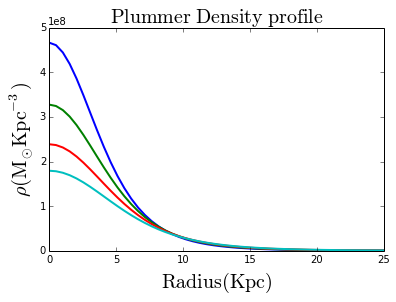

In [183]:
for i in range(8, 12):
    plot(R, rho_plummer(i, R, M), lw=2)
xlabel('$\mathrm{Radius (Kpc)}$', fontsize=20)
ylabel(r'$\mathrm{\rho (M_\odot Kpc^{-3})}$', fontsize=20)
title('$\mathrm{Plummer\ Density\ profile}$', fontsize=20)

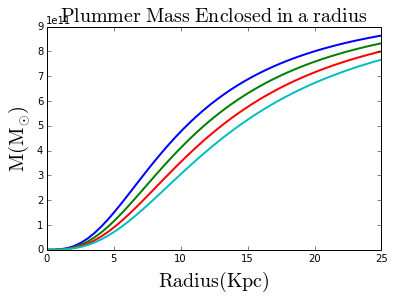

In [179]:
for i in range(8, 12):
    plot(R, mass_plummer(i, R, M), lw=2)
xlabel('$\mathrm{Radius (Kpc)}$', fontsize=20)
ylabel('$\mathrm{M (M_\odot)}$', fontsize=20)
title('$\mathrm{Plummer\ Mass\ Enclosed\ in\ a\ radius}$', fontsize=20)

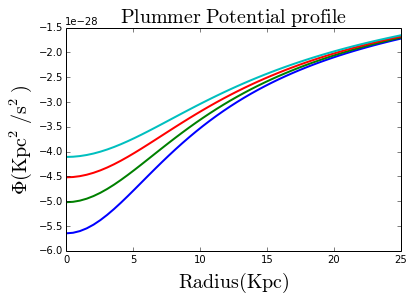

In [173]:
for i in range(8, 12):
    plot(R, potential_plummer(i, R, M), lw=2)
xlabel('$\mathrm{Radius (Kpc)}$', fontsize=20)
ylabel('$\mathrm{\Phi(Kpc^2/s^2)}$', fontsize=20)
title('$\mathrm{Plummer\ Potential\ profile}$', fontsize=20)

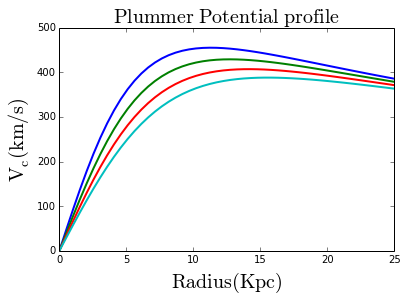

In [158]:
for i in range(8, 12):
    plot(R, vc_plummer(i, R, M), lw=2)
xlabel('$\mathrm{Radius (Kpc)}$', fontsize=20)
ylabel('$\mathrm{V_c(km/s)}$', fontsize=20)
title('$\mathrm{Plummer\ Potential\ profile}$', fontsize=20)

# Hernquist Profile

$\rho_{Hernquist}(r) =  \frac{M}{2\pi a^3} \frac{a^4}{r(r+a)^3}$

$M_{Hernquist}(<r) = 2aM \int \frac{r}{(r+a)^3}dr $

$M_{Hernquist}(<r) = M \frac{r^2}{(r+a)^2}$

$v_c(r) = GM \frac{r}{(r+a)^2}$

$\Phi = - \frac{GM}{r+a}$

In [159]:
def Mass_Hernquist(a, r, M):
    a = a*units.kpc
    Mass = M * r**2 / (r+a)**2
    return Mass

In [160]:
def Density_Hernquist(a, r, M):
    a = a*units.kpc
    rho = M / (2 * np.pi) * a / (r*(r+a)**3)
    return rho

In [161]:
def Potential_Hernquist(a, r, M):
    a = a*units.kpc
    phi = -G*M / (r+a)
    return phi

In [176]:
def vc_Hernquist(a, r, M):
    a = a*units.kpc
    vc = np.sqrt(G*M*r/(r+a)**2)
    vc = vc.to(units.km / units.s)
    return vc

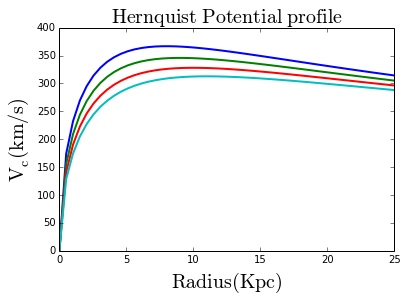

In [177]:
for i in range(8, 12):
    plot(R, vc_Hernquist(i, R, M), lw=2)
xlabel('$\mathrm{Radius (Kpc)}$', fontsize=20)
ylabel('$\mathrm{V_c(km/s)}$', fontsize=20)
title('$\mathrm{Hernquist\ Potential\ profile}$', fontsize=20)

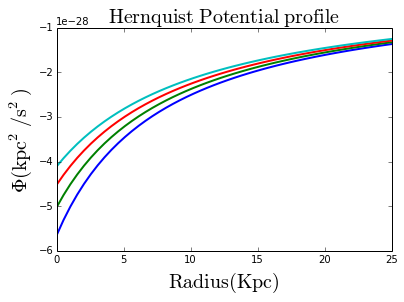

In [178]:
for i in range(8, 12):
    plot(R, Potential_Hernquist(i, R, M), lw=2)
xlabel('$\mathrm{Radius (Kpc)}$', fontsize=20)
ylabel('$\mathrm{\Phi(kpc^2/s^2)}$', fontsize=20)
title('$\mathrm{Hernquist\ Potential\ profile}$', fontsize=20)

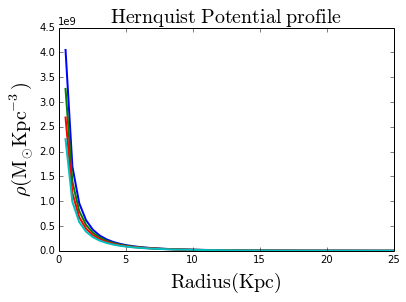

In [184]:
for i in range(8, 12):
    plot(R, Density_Hernquist(i, R, M), lw=2)
xlabel('$\mathrm{Radius (Kpc)}$', fontsize=20)
ylabel(r'$\mathrm{\rho (M_\odot Kpc^{-3})}$', fontsize=20)
title('$\mathrm{Hernquist\ Potential\ profile}$', fontsize=20)

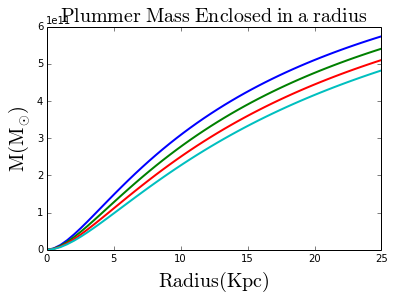

In [185]:
for i in range(8, 12):
    plot(R, Mass_Hernquist(i, R, M), lw=2)
xlabel('$\mathrm{Radius (Kpc)}$', fontsize=20)
ylabel('$\mathrm{M (M_\odot)}$', fontsize=20)
title('$\mathrm{Plummer\ Mass\ Enclosed\ in\ a\ radius}$', fontsize=20)